# Decision Tree Classification

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO
import numpy as np

In [2]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix

In [3]:
df = pd.read_csv('./data/iris_data.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 5)

In [5]:
df['flower'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'flower'], dtype='object')

- #### 1. Plot a scatter of all feature columns. Note which of them are highly correlated. Consider those feature columns only.

In [7]:
setosa=df[df['flower']=='Iris-setosa']
versicolor=df[df['flower']=='Iris-versicolor']
virginica=df[df['flower']=='Iris-virginica']

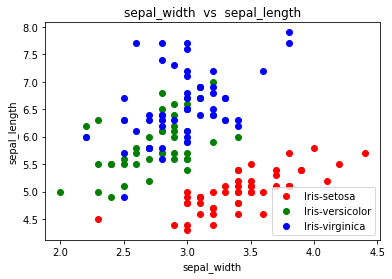

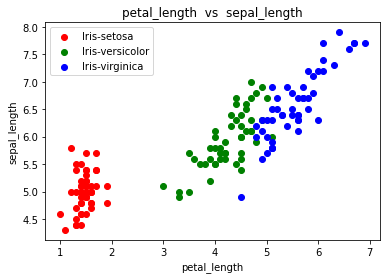

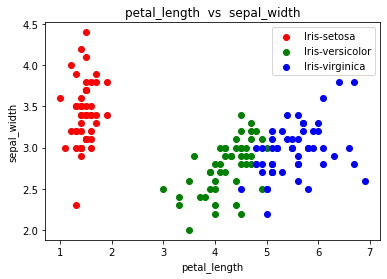

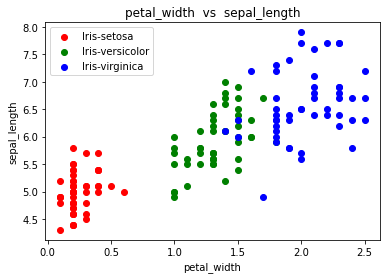

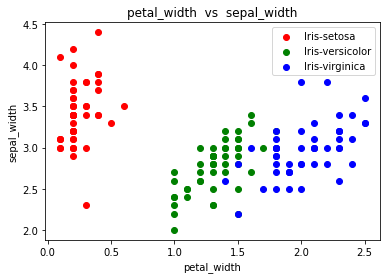

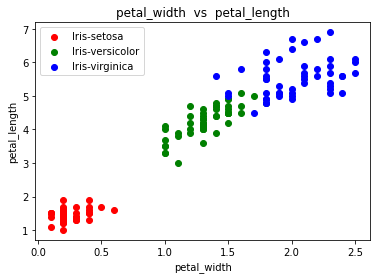

In [8]:
for i in range(4):
    for j in range(i):
        plt.figure()
        plt.scatter(setosa[df.columns[i]],setosa[df.columns[j]],color='r',label='Iris-setosa')
        plt.scatter(versicolor[df.columns[i]],versicolor[df.columns[j]],color='g',label='Iris-versicolor')
        plt.scatter(virginica[df.columns[i]],virginica[df.columns[j]],color='b',label='Iris-virginica')
        plt.xlabel(df.columns[i])
        plt.ylabel(df.columns[j])
        plt.title(df.columns[i] + "  vs  " + df.columns[j])
        plt.legend()
        plt.show()

#### 2. The flower column of the data is a string denoting the flower. Convert Iris-setosa, Iris-versicolor and Iris-virginica to numbers 0, 1, 2 respectively with a lambda method and apply method of pandas.

###### CORRELATION MATRIX

In [9]:
flower=list(df['flower'].unique())
num=list(range(len(flower)))
mapping=dict(zip(flower,num))
df['n_flower']=df['flower'].apply(lambda x:mapping[x])
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,n_flower
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
n_flower,0.782561,-0.419446,0.949043,0.956464,1.000000


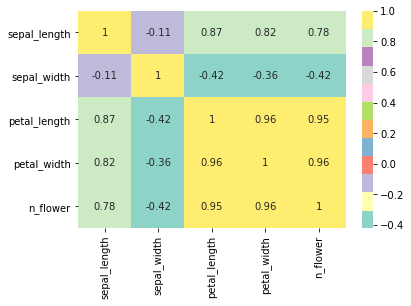

In [10]:
import seaborn as sb
sb.heatmap(df.corr(),annot=True,cmap='Set3')

#### From graph and correlation matrix it can be noticed that petal length and petal widh more correlated than oters so we will conider thene teo column as input features

#### 3. Split your dataset into training and testing. There should be 40 samples of each flower in the training dataset, and 10 of each in the testing dataset. Apply a decision tree classifier over the training dataset, with entropy gain.

In [11]:
new_df=df[['petal_length','petal_width','n_flower']]
setosa=new_df[new_df['n_flower']==0]
versicolor=new_df[new_df['n_flower']==1]
virginica=new_df[new_df['n_flower']==2]

In [12]:
new_df

,petal_length,petal_width,n_flower
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


In [13]:
from sklearn.model_selection import train_test_split
setosa_Xtrain,setosa_Xtest,setosa_Ytrain,setosa_Ytest=train_test_split(setosa[['petal_length','petal_width']],
                                                                       setosa['n_flower'],test_size=0.2)
versicolor_Xtrain,versicolor_Xtest,versicolor_Ytrain,versicolor_Ytest=train_test_split(versicolor[['petal_length','petal_width']],
                                                                       versicolor['n_flower'],test_size=0.2)
virginica_Xtrain,virginica_Xtest,virginica_Ytrain,virginica_Ytest=train_test_split(virginica[['petal_length','petal_width']],
                                                                       virginica['n_flower'],test_size=0.2)

In [14]:
Xtrain=pd.concat([setosa_Xtrain,versicolor_Xtrain,virginica_Xtrain])
Xtest=pd.concat([setosa_Xtest,versicolor_Xtest,virginica_Xtest])
Ytrain=pd.concat([setosa_Ytrain,versicolor_Ytrain,virginica_Ytrain])
Ytest=pd.concat([setosa_Ytest,versicolor_Ytest,virginica_Ytest])

In [15]:
from sklearn.tree import DecisionTreeClassifier


decisiontree=DecisionTreeClassifier(criterion='entropy',max_depth=2)
obtained_tree=decisiontree.fit(Xtrain,Ytrain)

In [16]:
print(new_df['n_flower'].tolist())
Predicted_flower=obtained_tree.predict(new_df[['petal_length','petal_width']])
print(Predicted_flower)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


#### 4. Find the following for depth of the tree varying from 2 to 4:
- The decision tree, Confusion Matrix.  
- What do you observe as your depth increases? Compare the decision tree & accuracy of each model using confusion matrix.


### MAX_DEPTH =2

##### Confusion matrix  for max_depth=2


In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

confusion_matrix(new_df['n_flower'],Predicted_flower)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  4, 46]], dtype=int64)

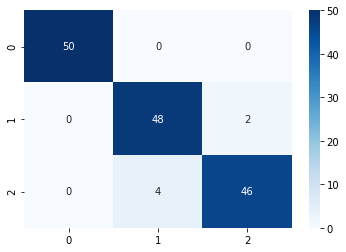

In [18]:
import seaborn as sb
sb.heatmap(confusion_matrix(new_df['n_flower'],Predicted_flower),cmap='Blues',annot=True,
           xticklabels=decisiontree.classes_,yticklabels=decisiontree.classes_)

In [19]:
print(classification_report(new_df['n_flower'],Predicted_flower))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.92      0.96      0.94        50
           2       0.96      0.92      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



##### Decision Tree

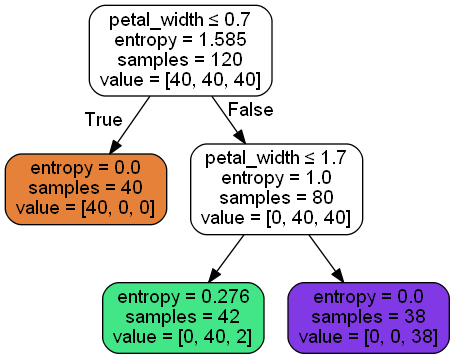

In [20]:
import os
os.environ["PATH"]+=os.pathsep + 'C:\\Program Files (x86)\\Graphviz2.38\\bin'


from sklearn.tree import export_graphviz       ## Export a decision tree in DOT format.
import pydotplus                               ## Convert dot image into pixel file
from IPython.display import Image              ## it will show the pixel image as image

DecisionTreeImg=StringIO()                      ## it will store the dot image
export_graphviz (obtained_tree,out_file=DecisionTreeImg,
                filled=True,rounded=True,feature_names=['petal_length','petal_width'],
                special_characters=True)

graph=pydotplus.graph_from_dot_data(DecisionTreeImg.getvalue())
Image(graph.create_png())

### MAX_DEPTH = 3

##### Confusion Matrix

In [21]:
decisiontree1=DecisionTreeClassifier(criterion='entropy',max_depth=3)
obtained_tree1=decisiontree1.fit(Xtrain,Ytrain)

In [22]:
print(new_df['n_flower'].tolist())
Predicted_flower1=obtained_tree1.predict(new_df[['petal_length','petal_width']])
print(Predicted_flower1)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

confusion_matrix(new_df['n_flower'],Predicted_flower1)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  0, 50]], dtype=int64)

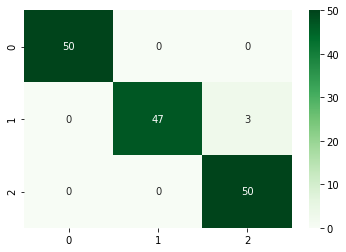

In [24]:
import seaborn as sb
sb.heatmap(confusion_matrix(new_df['n_flower'],Predicted_flower1),cmap='Greens',annot=True,
           xticklabels=decisiontree.classes_,yticklabels=decisiontree.classes_)

In [25]:
print(classification_report(new_df['n_flower'],Predicted_flower1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      0.94      0.97        50
           2       0.94      1.00      0.97        50

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



##### Decision Tree

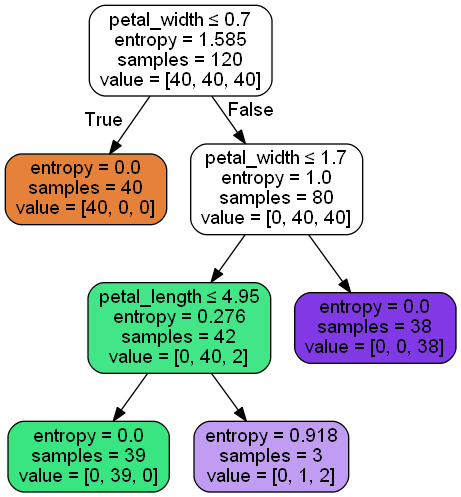

In [26]:
import os
os.environ["PATH"]+=os.pathsep + 'C:\\Program Files (x86)\\Graphviz2.38\\bin'


from sklearn.tree import export_graphviz       ## Export a decision tree in DOT format.
import pydotplus                               ## Convert dot image into pixel file
from IPython.display import Image              ## it will shoe the pixel image as image

DecisionTreeImg=StringIO()                      ## it will strore the dot image
export_graphviz (obtained_tree1,out_file=DecisionTreeImg,
                filled=True,rounded=True,feature_names=['petal_length','petal_width'],
                special_characters=True)

graph=pydotplus.graph_from_dot_data(DecisionTreeImg.getvalue())
Image(graph.create_png())

### MAX _DEPTH =4

##### Confusion Matrix

In [27]:
decisiontree2=DecisionTreeClassifier(criterion='entropy',max_depth=4)
obtained_tree2=decisiontree2.fit(Xtrain,Ytrain)

In [28]:
print(new_df['n_flower'].tolist())
Predicted_flower2=obtained_tree2.predict(new_df[['petal_length','petal_width']])
print(Predicted_flower2)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

confusion_matrix(new_df['n_flower'],Predicted_flower2)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  3, 47]], dtype=int64)

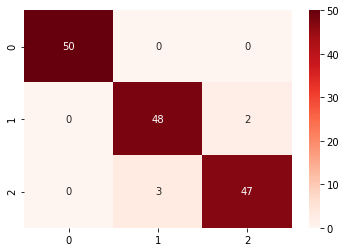

In [30]:
import seaborn as sb
sb.heatmap(confusion_matrix(new_df['n_flower'],Predicted_flower2),cmap='Reds',annot=True,
           xticklabels=decisiontree.classes_,yticklabels=decisiontree.classes_)

In [31]:
print(classification_report(new_df['n_flower'],Predicted_flower2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.96      0.95        50
           2       0.96      0.94      0.95        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



##### Decision Tree


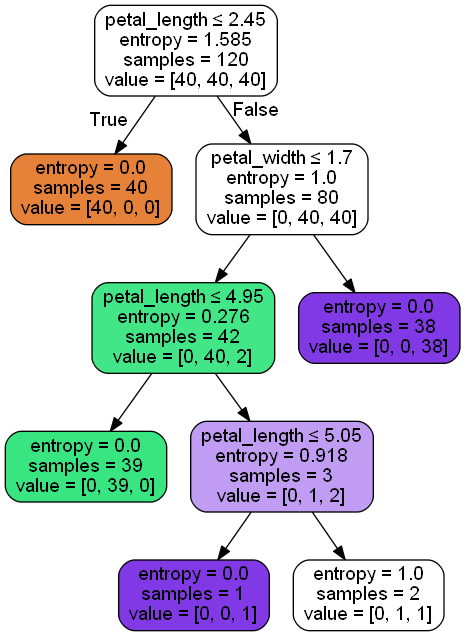

In [32]:
import os
os.environ["PATH"]+=os.pathsep + 'C:\\Program Files (x86)\\Graphviz2.38\\bin'


from sklearn.tree import export_graphviz       ## Export a decision tree in DOT format.
import pydotplus                               ## Convert dot image into pixel file
from IPython.display import Image              ## it will shoe the pixel image as image

DecisionTreeImg=StringIO()                      ## it will strore the dot image
export_graphviz (obtained_tree2,out_file=DecisionTreeImg,
                filled=True,rounded=True,feature_names=['petal_length','petal_width'],
                special_characters=True)

graph=pydotplus.graph_from_dot_data(DecisionTreeImg.getvalue())
Image(graph.create_png())

#### 5. Plot a contourf plot with 2 features to visualize the flower classification.

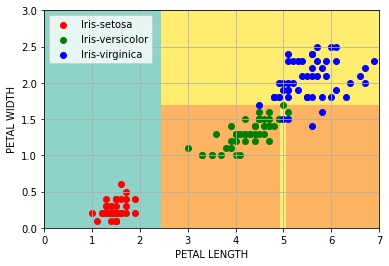

In [33]:
%matplotlib inline

x_min,x_max=0,7             
y_min,y_max=0,3              

xx, yy=np.meshgrid(np.arange(x_min,x_max,0.001),np.arange(y_min,y_max,0.001))    
xx_lin=xx.ravel();   
yy_lin=yy.ravel();                            
pred_input=np.c_[xx_lin,yy_lin];            

Z=decisiontree2.predict(pred_input); # print(Z)      
Z=Z.reshape(xx.shape)                           


#contour plot requires 2 dimensional matrix
plt.contourf(xx,yy, Z, cmap=plt.cm.Set3)    #does grouping with color

plt.scatter(setosa['petal_length'],setosa['petal_width'],color='r',label='Iris-setosa')
plt.scatter(versicolor['petal_length'],versicolor['petal_width'],color='g',label='Iris-versicolor')
plt.scatter(virginica['petal_length'],virginica['petal_width'],color='b',label='Iris-virginica')
plt.xlabel('PETAL LENGTH')
plt.ylabel('PETAL WIDTH')

plt.legend()
plt.axis([0,7,0,3])
plt.grid()

#### 6. Obtain the training and testing split with the train_test_split function with 80:20 split and random state 9032. Obtain the decision tree with depth 3. How does this model fare with the previous model? Give answers.

In [34]:
X1train,X1test,Y1train,Y21test=train_test_split(new_df[['petal_length','petal_width']],
                                                                       new_df['n_flower'],test_size=0.2,random_state=9032)

In [35]:
decisiontree3=DecisionTreeClassifier(criterion='entropy',max_depth=3)
obtained_tree3=decisiontree1.fit(X1train,Y1train)

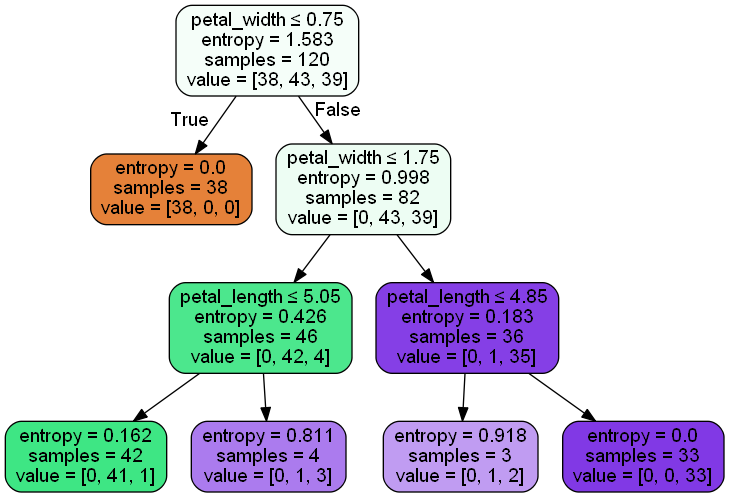

In [36]:
import os
os.environ["PATH"]+=os.pathsep + 'C:\\Program Files (x86)\\Graphviz2.38\\bin'


from sklearn.tree import export_graphviz       ## Export a decision tree in DOT format.
import pydotplus                               ## Convert dot image into pixel file
from IPython.display import Image              ## it will shoe the pixel image as image

DecisionTreeImg=StringIO()                      ## it will strore the dot image
export_graphviz (obtained_tree3,out_file=DecisionTreeImg,
                filled=True,rounded=True,feature_names=['petal_length','petal_width'],
                special_characters=True)

graph=pydotplus.graph_from_dot_data(DecisionTreeImg.getvalue())
Image(graph.create_png())

 **In the first model 'obtained_tree' the number of training and testing data from each classes is same i.e (40,40,40) value form each class, but in the next model 'obtained_tree3' the number of training and testing datas from each class is not same training value from 'Iris-setosa' is 39, 'Iris-versicolor' is 43  'Iris-virginica' is 39 so training datas are more biased towards the 'Iris-versicolor' class .**

**So, in the first model ouput is more accurate than the above model.**